## Modelling

In [ ]:
!pip install skimpy

In [ ]:
#==========================
# ---- Libraries
#==========================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import warnings
from google.colab import drive
from skimpy import clean_columns
warnings.filterwarnings('ignore')


In [ ]:
#===============================
# Load Dataset
#==============================
drive.mount('/content/drive',
            force_remount=True)

df = pd.read_parquet('/content/drive/MyDrive/RecSys/data/processed/df_extendida_clean.parquet')
print(df.shape)
df.head(3)

ArrowInvalid: Could not open Parquet input source '<Buffer>': Parquet magic bytes not found in footer. Either the file is corrupted or this is not a parquet file.

### Exploratory Data Analysis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7527130 entries, 0 to 7527129
Data columns (total 20 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   DiaID                   datetime64[ns]
 1   Id_Persona              object        
 2   ESPECIALIDAD            object        
 3   HORA_INICIO             datetime64[ns]
 4   HORA_FIN                datetime64[ns]
 5   LOCALIZACION_EXTERNA    object        
 6   MONTO                   Float64       
 7   Neteo_Mensual           object        
 8   Neteo_Diario            object        
 9   ESTADO_CIVIL            object        
 10  Edad                    Int64         
 11  GENERO                  object        
 12  ROL                     object        
 13  Antiguedad_Socio_Unico  Float64       
 14  SEGMENTO_COMERCIAL      object        
 15  Ciudad                  object        
 16  Zona                    object        
 17  Region                  object        
 18  CA

In [ ]:
#================================
# Clean names
#================================
df = clean_columns(df)
df.head()

,dia_id,id_persona,especialidad,hora_inicio,hora_fin,localizacion_externa,monto,neteo_mensual,neteo_diario,estado_civil,edad,genero,rol,antiguedad_socio_unico,segmento_comercial,ciudad,zona,region,cadena,establecimiento
0,2025-07-01,21096.0,SUPERMERCADOS,2025-10-31 12:12:02.450,2025-10-31 12:12:02.559,SUPERMAXI CUE ECU,34.73,S,S,CASADO,89,Masculino,Principal Persona,571.0,SENIOR,CUENCA,ZONA CUENCA,ZONA COMERCIAL SIERRA,SUPERMAXI,SUPERMAXI PLAZA AMERICAS
1,2025-07-01,21249.0,COMIDA RAPIDA,2025-10-31 14:40:40.215,2025-10-31 14:40:40.327,LA TAQUERIA 57 CUE EC,29.5,S,S,VIUDO,78,Femenino,Adicional Personal,153.283763,SENIOR,CUENCA,ZONA CUENCA,ZONA COMERCIAL SIERRA,LA TAQUERIA 57,LA TAQUERIA 57
2,2025-07-01,21275.0,SUPERMERCADOS,2025-10-31 14:15:53.988,2025-10-31 14:15:54.067,SUPERMAXI CUE ECU,59.26,S,S,CASADO,81,Masculino,Principal Persona,452.0,SENIOR,CUENCA,ZONA CUENCA,ZONA COMERCIAL SIERRA,SUPERMAXI,SUPERMAXI PLAZA AMERICAS
3,2025-07-01,21533.0,SUPERMERCADOS,2025-10-31 13:45:50.677,2025-10-31 13:45:50.799,MEGAMAXI UIO ECU,71.07,S,S,CASADO,85,Masculino,Principal Persona,446.0,SENIOR,QUITO,ZONA QUITO,ZONA COMERCIAL SIERRA,SUPERMAXI,MEGAMAXI 6 DE DICIEMBRE
4,2025-07-01,21563.0,GASOLINERAS,2025-10-31 07:44:40.026,2025-10-31 07:44:40.092,REPSOL AZOGUES AZO EC,20.0,S,S,CASADO,78,Masculino,Principal Persona,320.0,SENIOR,CUENCA,ZONA CUENCA,ZONA COMERCIAL SIERRA,GASOLINERA REPSOL,GASOLINERA REPSOL


In [ ]:
#===========================
# Variables Transformation
#===========================
df['id_persona'] = df['id_persona'].astype(float)
df['id_persona'] = df['id_persona'].astype(int)
df['antiguedad_socio_unico'] = df['antiguedad_socio_unico'].astype(int)
df['especialidad'] = df['especialidad'].str.strip().str.title()
df['localizacion_externa'] = df['localizacion_externa'].str.strip().str.title()
df['estado_civil'] = df['estado_civil'].str.strip().str.title()
df['genero'] = df['genero'].str.strip().str.title()
df['segmento_comercial'] = df['segmento_comercial'].str.strip().str.title()
df['ciudad'] =  df['ciudad'].str.strip().str.title()
df['zona'] = df['zona'].str.strip().str.title()
df['region'] = df['region'].str.strip().str.title()
df['cadena'] = df['cadena'].str.strip().str.title()
df['establecimiento'] = df['establecimiento'].str.strip().str.title()



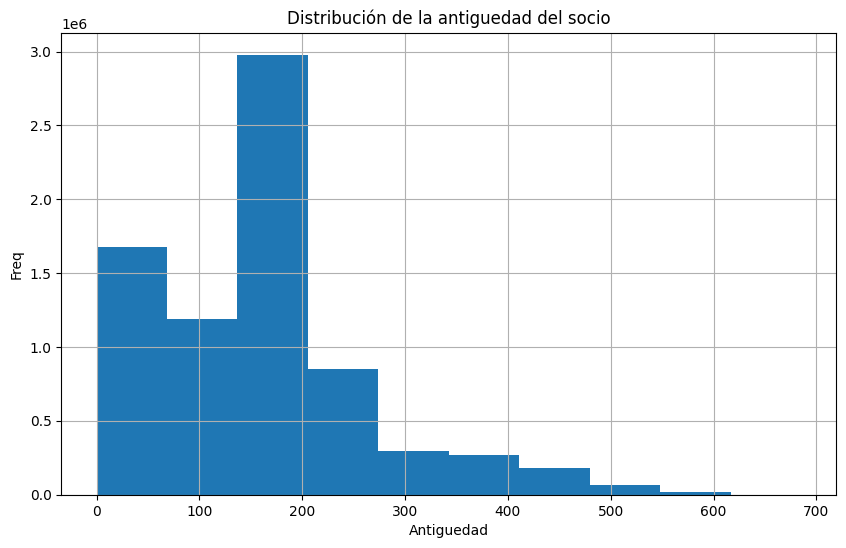

In [ ]:
plt.figure(figsize=(10, 6))
df['antiguedad_socio_unico'].hist()
plt.title('Distribución de la antiguedad del socio')
plt.xlabel('Antiguedad')
plt.ylabel('Freq')
plt.show()



In [ ]:

print('Max:',df['antiguedad_socio_unico'].max())
print('Min',df['antiguedad_socio_unico'].min())
print('Median',df['antiguedad_socio_unico'].median())
print('Cuartil 25 (Q1):', df['antiguedad_socio_unico'].quantile(0.25))
print('Cuartil 75 (Q3):', df['antiguedad_socio_unico'].quantile(0.75))
print('Cuartil 99 :', df['antiguedad_socio_unico'].quantile(0.98))


Max: 685
Min 0
Median 153.0
Cuartil 25 (Q1): 78.0
Cuartil 75 (Q3): 184.0
Cuartil 99 : 446.0


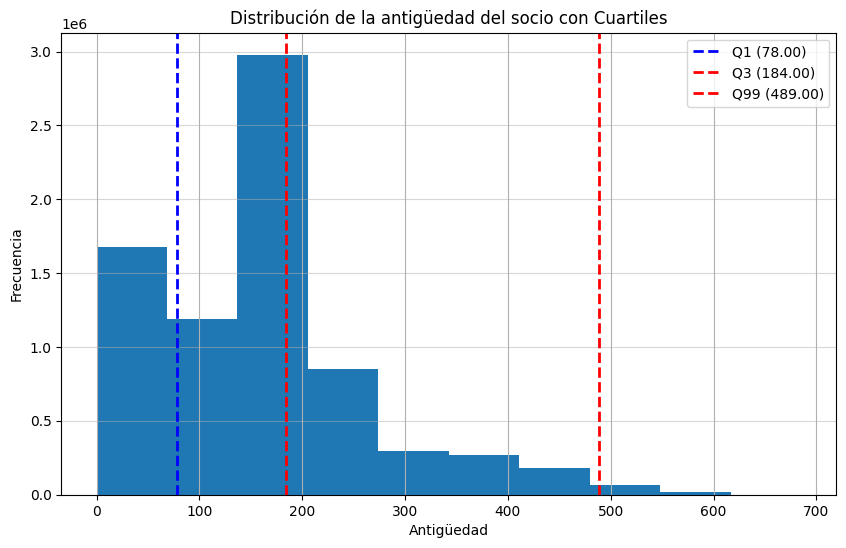

In [ ]:
q25 = df['antiguedad_socio_unico'].quantile(0.25)
q75 = df['antiguedad_socio_unico'].quantile(0.75)
q99 = df['antiguedad_socio_unico'].quantile(0.99)

plt.figure(figsize=(10, 6))
df['antiguedad_socio_unico'].hist()
plt.axvline(q25, color='blue', linestyle='dashed', linewidth=2, label=f'Q1 ({q25:.2f})')
plt.axvline(q75, color='red', linestyle='dashed', linewidth=2, label=f'Q3 ({q75:.2f})')
plt.axvline(q99, color='red', linestyle='dashed', linewidth=2, label=f'Q99 ({q99:.2f})')
plt.title('Distribución de la antigüedad del socio con Cuartiles')
plt.xlabel('Antigüedad')
plt.ylabel('Frecuencia')
plt.legend()
plt.grid(axis='y', alpha=0.5)
plt.show()

In [ ]:
df = df[df['antiguedad_socio_unico']<df['antiguedad_socio_unico'].quantile(0.99)].reset_index(drop=True)

In [ ]:
print('reduccion de ',7527130 - 7451636)
print('A nivel porcentual : ',round((75494/7527130)*100,3),'%')

reduccion de  75494
A nivel porcentual :  1.003 %


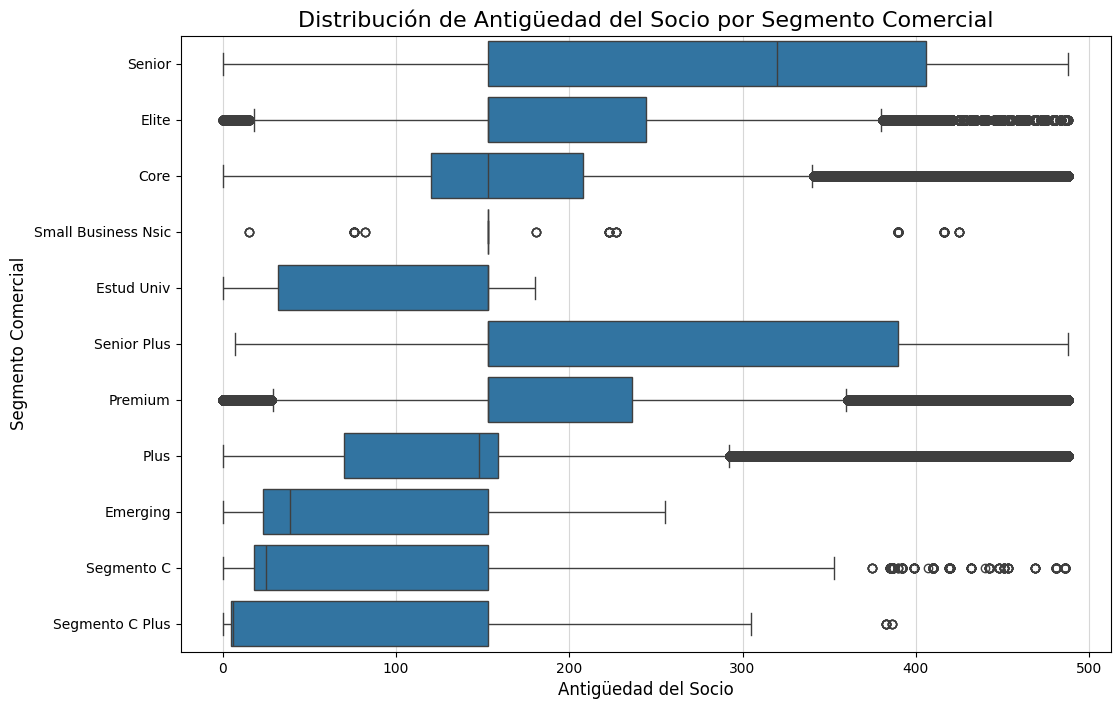

In [ ]:
median_order = df.groupby('segmento_comercial')['antiguedad_socio_unico'].median()
ordered_segments = median_order.sort_values(ascending=False).index.tolist()

plt.figure(figsize=(12, 8))

sns.boxplot(x=df['antiguedad_socio_unico'],
            y=df['segmento_comercial'],
            order=ordered_segments)

plt.title('Distribución de Antigüedad del Socio por Segmento Comercial', fontsize=16)
plt.xlabel('Antigüedad del Socio', fontsize=12)
plt.ylabel('Segmento Comercial', fontsize=12)
plt.grid(axis='x', alpha=0.5)
plt.show()

Text(0.5, 1.0, 'Distribución de Antigüedad del Socio por Segmento Comercial')

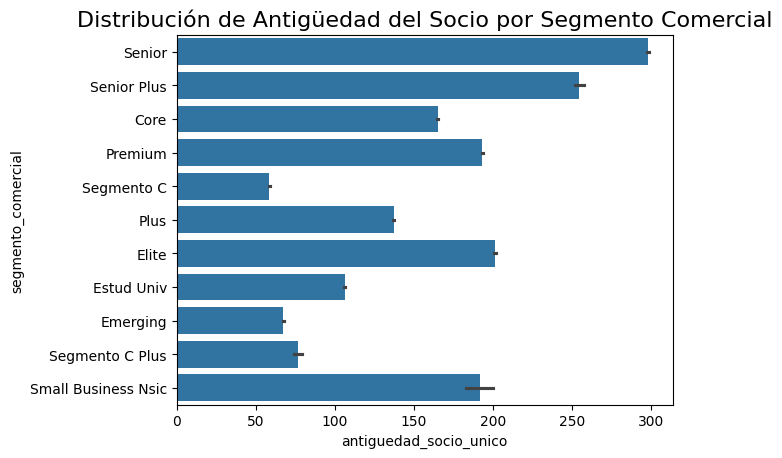

In [ ]:
sns.barplot(x=df['antiguedad_socio_unico'],
            y=df['segmento_comercial'])
plt.title('Distribución de Antigüedad del Socio por Segmento Comercial', fontsize=16)

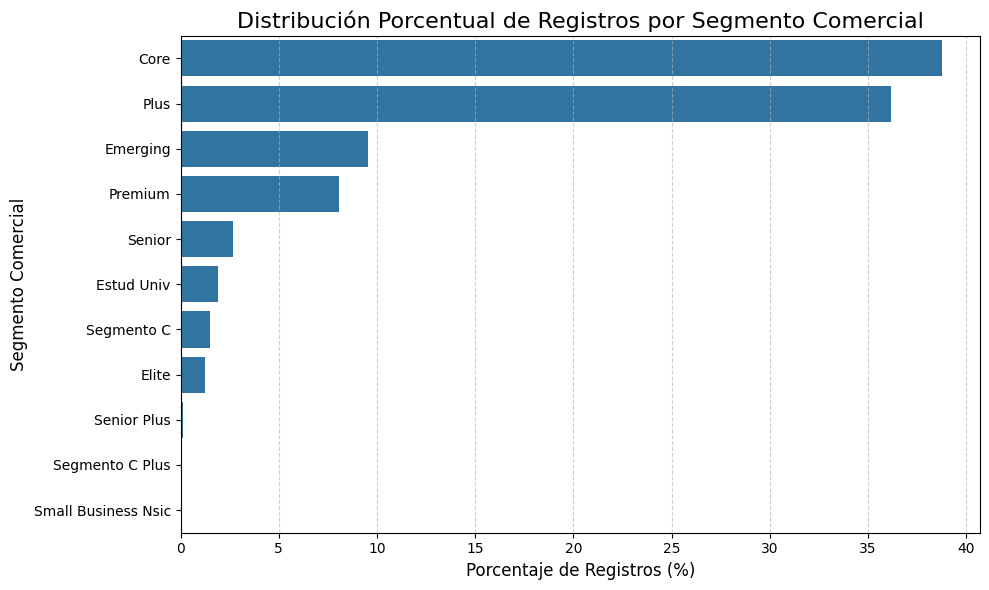

In [ ]:
segment_counts = df['segmento_comercial'].value_counts(normalize=True) * 100

plt.figure(figsize=(10, 6))

sns.barplot(x=segment_counts.values,
            y=segment_counts.index,
            order=segment_counts.index)

plt.title('Distribución Porcentual de Registros por Segmento Comercial', fontsize=16)
plt.xlabel('Porcentaje de Registros (%)', fontsize=12)
plt.ylabel('Segmento Comercial', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

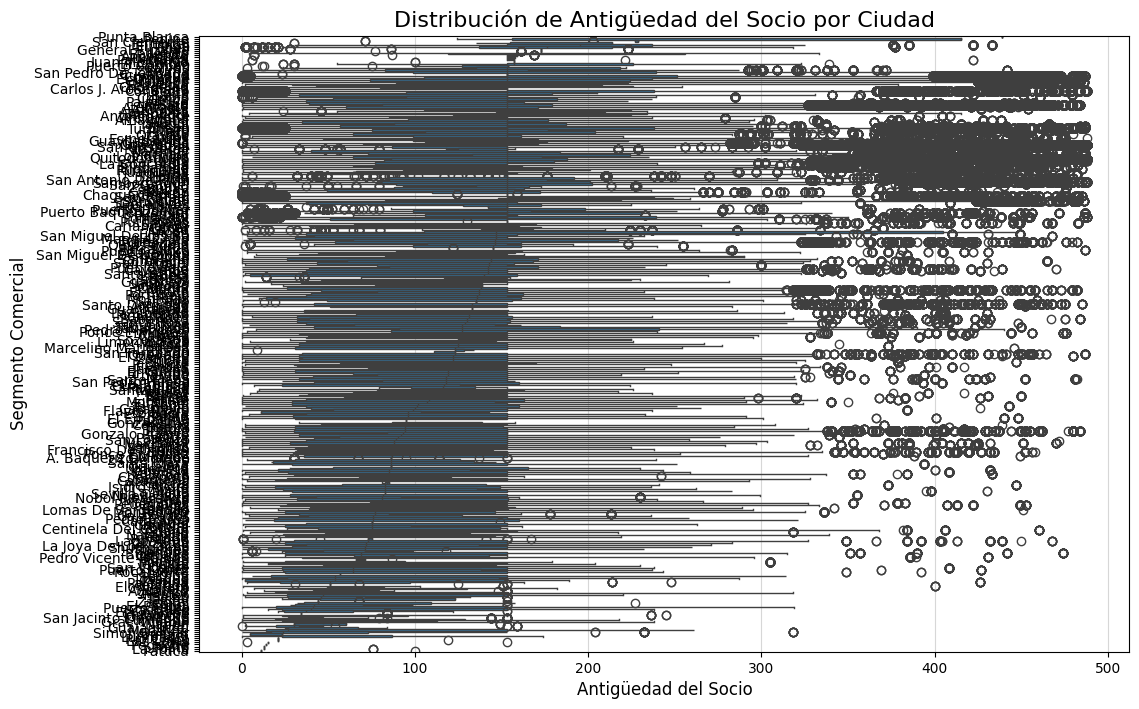

In [ ]:
median_order = df.groupby('ciudad')['antiguedad_socio_unico'].median()
ordered_segments = median_order.sort_values(ascending=False).index.tolist()

plt.figure(figsize=(12, 8))

sns.boxplot(x=df['antiguedad_socio_unico'],
            y=df['ciudad'],
            order=ordered_segments)

plt.title('Distribución de Antigüedad del Socio por Ciudad', fontsize=16)
plt.xlabel('Antigüedad del Socio', fontsize=12)
plt.ylabel('Segmento Comercial', fontsize=12)
plt.grid(axis='x', alpha=0.5)
plt.show()

In [ ]:
df_by_city = df.groupby('ciudad')['antiguedad_socio_unico'].size().reset_index().sort_values(by='antiguedad_socio_unico', ascending=False)
df_by_city.tail()

,ciudad,antiguedad_socio_unico
188,Peguche,3
97,Guachapala,3
176,Paquisha,2
222,Quilanga,2
180,Pasto,1


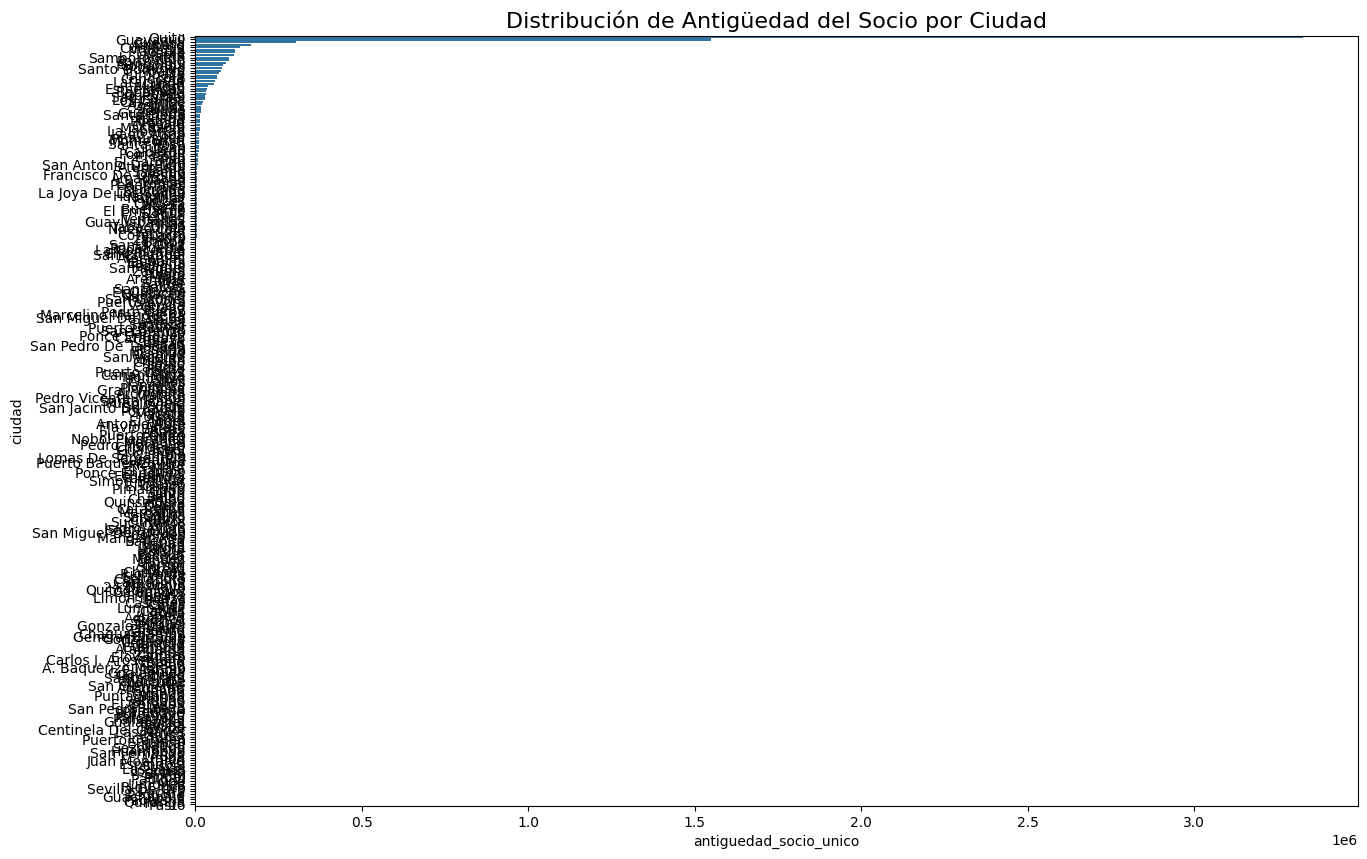

In [ ]:
plt.figure(figsize=(15, 10))
sns.barplot(x=df_by_city['antiguedad_socio_unico'],
            y=df_by_city['ciudad'])
plt.title('Distribución de Antigüedad del Socio por Ciudad', fontsize=16)
plt.show()

In [ ]:
df_by_city['antiguedad_socio_unico'].quantile(0.1)

np.float64(25.200000000000003)

In [ ]:
df_by_city[df_by_city['antiguedad_socio_unico']>25]['ciudad']

,ciudad
225,Quito
105,Guayaquil
62,Cuenca
6,Ambato
64,Cumbaya
...,...
177,Parcayacu
172,Pallatanga
101,Gualaquiza.
276,Taisha


In [ ]:
ciudades_con_alta_antiguedad_df = df_by_city[df_by_city['antiguedad_socio_unico'] > 25]
nombres_de_ciudades = ciudades_con_alta_antiguedad_df['ciudad'].unique()

df_filtrado = df[df['ciudad'].isin(nombres_de_ciudades)]

In [ ]:
print('reduccion de ',7451636 -7451346)
print('A nivel porcentual : ',round((1-7451346/7451636)*100,3),'%')

reduccion de  290
A nivel porcentual :  0.004 %


In [ ]:
df_cadena_perc = (df_filtrado['cadena'].value_counts(normalize=True, ascending=False)*100).reset_index()
df_cadena_perc

,cadena,proportion
0,Supermaxi,15.132165
1,Mi Comisariato,5.226975
2,Primax,4.332439
3,Fybeca,3.568161
4,Sweet & Coffee,2.038759
...,...,...
21579,Costanera Center,0.000013
21580,Mega Ropa,0.000013
21581,30 11 Bar Roc,0.000013
21582,La Pausa,0.000013


In [ ]:
df_frec_cadena = df_filtrado['cadena'].value_counts(ascending=False).reset_index()
df_frec_cadena

,cadena,count
0,Supermaxi,1127550
1,Mi Comisariato,389480
2,Primax,322825
3,Fybeca,265876
4,Sweet & Coffee,151915
...,...,...
21579,Costanera Center,1
21580,Mega Ropa,1
21581,30 11 Bar Roc,1
21582,La Pausa,1


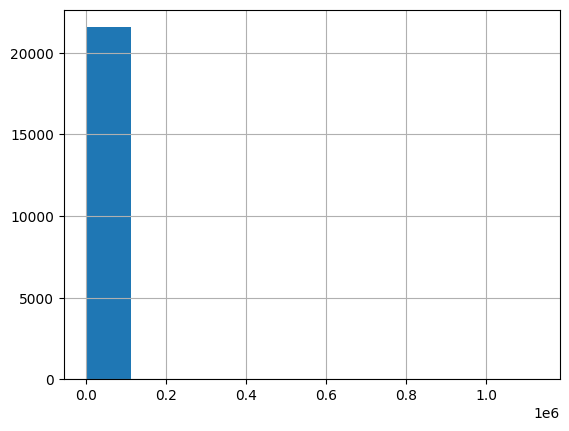

In [ ]:
df_frec_cadena['count'].hist()
plt.show()

In [ ]:
df_frec_cadena['count'].quantile([0.25,0.3,0.4,0.50,0.75])

,count
0.25,3.0
0.30,4.0
0.40,7.0
0.50,11.0
0.75,51.0


In [ ]:
df_frec_cadena[df_frec_cadena['count']<7]['cadena']



,cadena
13086,Wap S Boutique
13087,Marenmoto
13088,Tecnoscape
13089,Polyssol
13090,Farmaceutica Farmasalud
...,...
21579,Costanera Center
21580,Mega Ropa
21581,30 11 Bar Roc
21582,La Pausa


In [ ]:
filtro_cadena = df_frec_cadena[df_frec_cadena['count'] < 7]['cadena'].unique()
df_filtrado_cadena = df_filtrado[~df_filtrado['cadena'].isin(filtro_cadena)]
df_filtrado_cadena.shape

(7428269, 20)

In [ ]:
df_filtrado.shape

(7451346, 20)

In [ ]:
df_establecimiento = df_filtrado_cadena['establecimiento'].value_counts(ascending=False).reset_index()
df_establecimiento

,establecimiento,count
0,Fybeca,257299
1,Farmaenlace Cia.Ltda.,146353
2,Difare S.A.,140667
3,Almacenes Tia,120128
4,Mi Comisariato,89588
...,...,...
19345,Cnt Coactivas Bolivar,1
19346,Santa Martha 570,1
19347,Ferreteria El Gran Constructor,1
19348,Farmacia Santa Martha 540,1


In [ ]:
df_establecimiento['count'].quantile([0.1,0.20,0.25,0.3,0.4,0.50,0.75])

,count
0.10,7.0
0.20,10.0
0.25,12.0
0.30,15.0
0.40,22.0
0.50,35.0
0.75,145.0


In [ ]:
df_establecimiento[df_establecimiento['count']<7]['establecimiento']

,establecimiento
17776,Farmacia Economica 17
17777,Up Markets Cumbaya
17778,Farmacia Santa Martha N 203
17779,Holcim Juan Alejandro Altamirano
17780,Dipaso S A
...,...
19345,Cnt Coactivas Bolivar
19346,Santa Martha 570
19347,Ferreteria El Gran Constructor
19348,Farmacia Santa Martha 540


In [ ]:
filtro_establecimiento = df_establecimiento[df_establecimiento['count'] < 7]['establecimiento'].unique()
df_filtrado_establecimiento = df_filtrado_cadena[~df_filtrado_cadena['establecimiento'].isin(filtro_establecimiento)]
df_filtrado_establecimiento.shape

(7423486, 20)

In [ ]:
df = df_filtrado_establecimiento

In [ ]:
#df.to_parquet('df_final.parquet')

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
# print(f"Registros totales: {len(df_sample):,}")
# print(f"Establecimientos unicos: {df_sample['establecimiento'].nunique()}")

# establecimientos_unicos = df_sample['establecimiento'].unique()
# print(f"\nPrimeros 20 establecimientos:")
# for i, est in enumerate(establecimientos_unicos[:20], 1):
#     print(f"{i}. {est}")

# print("\n" + "="*70)
# print("METODO 1: SIMILITUD DE COSENO CON TF-IDF")
# print("="*70)

# vectorizer = TfidfVectorizer(analyzer='char', ngram_range=(2, 3))
# tfidf_matrix = vectorizer.fit_transform(establecimientos_unicos)

# cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# print(f"\nMatriz de similitud: {cosine_sim.shape}")
# print(f"Valores entre 0 (diferentes) y 1 (identicos)")

# similarity_threshold = 0.7

# print(f"\nBuscando establecimientos con similitud > {similarity_threshold}...")

# similar_pairs = []
# for i in range(len(establecimientos_unicos)):
#     for j in range(i+1, len(establecimientos_unicos)):
#         if cosine_sim[i][j] > similarity_threshold:
#             similar_pairs.append({
#                 'establecimiento_1': establecimientos_unicos[i],
#                 'establecimiento_2': establecimientos_unicos[j],
#                 'similitud_coseno': cosine_sim[i][j],
#                 'count_1': len(df_sample[df_sample['establecimiento'] == establecimientos_unicos[i]]),
#                 'count_2': len(df_sample[df_sample['establecimiento'] == establecimientos_unicos[j]])
#             })

# similar_pairs_df = pd.DataFrame(similar_pairs)
# similar_pairs_df = similar_pairs_df.sort_values('similitud_coseno', ascending=False)

# print(f"\nEncontrados {len(similar_pairs_df)} pares similares")

# print("\n" + "="*70)
# print("TOP 30 PARES MAS SIMILARES")
# print("="*70)

# for idx, row in similar_pairs_df.head(30).iterrows():
#     print(f"\nSimilitud: {row['similitud_coseno']:.4f}")
#     print(f"  1. {row['establecimiento_1']} (n={row['count_1']})")
#     print(f"  2. {row['establecimiento_2']} (n={row['count_2']})")


In [ ]:
df.shape

(7423486, 20)

In [ ]:
# similar_pairs_df[similar_pairs_df['similitud_coseno']>0.78]

In [ ]:
# df_filtrado_establecimiento[df_filtrado_establecimiento['establecimiento'].str.contains('Farmacia Cuxibamba')]

### Feature Engineering

In [ ]:
df.columns

Index(['dia_id', 'id_persona', 'especialidad', 'hora_inicio', 'hora_fin',
       'localizacion_externa', 'monto', 'neteo_mensual', 'neteo_diario',
       'estado_civil', 'edad', 'genero', 'rol', 'antiguedad_socio_unico',
       'segmento_comercial', 'ciudad', 'zona', 'region', 'cadena',
       'establecimiento'],
      dtype='object')

In [ ]:
df['dia_id'] = pd.to_datetime(df['dia_id'])
df['hora_inicio'] = pd.to_datetime(df['hora_inicio'])
df['hora_fin'] = pd.to_datetime(df['hora_fin'])


In [ ]:
    df_sample = df.sample(frac=0.1, random_state=42)
df_sample.shape

(742349, 20)

In [ ]:
#!pip install wandb

### Modelling

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Dispositivo: {device}")

class FeatureEngineer:
    def __init__(self):
        self.label_encoders = {}
        self.scaler = StandardScaler()
        self.establishment_encoder = LabelEncoder()
        self.feature_importance_data = {}

    def create_temporal_features(self, df):
        df = df.copy()
        df['hora_inicio'] = pd.to_datetime(df['hora_inicio'])
        df['hora'] = df['hora_inicio'].dt.hour
        df['dia_semana'] = df['hora_inicio'].dt.dayofweek
        df['mes'] = df['hora_inicio'].dt.month
        df['dia_mes'] = df['hora_inicio'].dt.day

        def get_time_slot(hour):
            if 6 <= hour < 12:
                return 'Manana'
            elif 12 <= hour < 18:
                return 'Tarde'
            elif 18 <= hour < 22:
                return 'Noche'
            else:
                return 'Madrugada'

        df['franja_horaria'] = df['hora'].apply(get_time_slot)
        df['es_fin_semana'] = (df['dia_semana'] >= 5).astype(int)
        df['hora_sin'] = np.sin(2 * np.pi * df['hora'] / 24)
        df['hora_cos'] = np.cos(2 * np.pi * df['hora'] / 24)
        df['dia_semana_sin'] = np.sin(2 * np.pi * df['dia_semana'] / 7)
        df['dia_semana_cos'] = np.cos(2 * np.pi * df['dia_semana'] / 7)
        df['mes_sin'] = np.sin(2 * np.pi * df['mes'] / 12)
        df['mes_cos'] = np.cos(2 * np.pi * df['mes'] / 12)
        return df

    def create_user_features(self, df):
        df = df.copy()
        df['log_monto'] = np.log1p(df['monto'])
        df['monto_squared'] = df['monto'] ** 2
        df['grupo_edad'] = pd.cut(df['edad'], bins=[0, 25, 35, 45, 55, 100],
                                   labels=['18-25', '26-35', '36-45', '46-55', '55+'])
        df['antiguedad_normalizada'] = df['antiguedad_socio_unico'] / df['antiguedad_socio_unico'].max()
        return df

    def create_interaction_features(self, df):
        df = df.copy()
        user_establishment_counts = df.groupby(['id_persona', 'establecimiento']).size().to_dict()
        df['user_establishment_freq'] = df.apply(
            lambda row: user_establishment_counts.get((row['id_persona'], row['establecimiento']), 0), axis=1)

        user_specialty_counts = df.groupby(['id_persona', 'especialidad']).size().to_dict()
        df['user_specialty_freq'] = df.apply(
            lambda row: user_specialty_counts.get((row['id_persona'], row['especialidad']), 0), axis=1)

        user_city_counts = df.groupby(['id_persona', 'ciudad']).size().to_dict()
        df['user_city_freq'] = df.apply(
            lambda row: user_city_counts.get((row['id_persona'], row['ciudad']), 0), axis=1)

        user_spending_stats = df.groupby('id_persona')['monto'].agg(['mean', 'std', 'min', 'max']).to_dict('index')
        df['user_avg_spending'] = df['id_persona'].map(lambda x: user_spending_stats.get(x, {}).get('mean', 0))
        df['user_std_spending'] = df['id_persona'].map(lambda x: user_spending_stats.get(x, {}).get('std', 0))
        df['user_min_spending'] = df['id_persona'].map(lambda x: user_spending_stats.get(x, {}).get('min', 0))
        df['user_max_spending'] = df['id_persona'].map(lambda x: user_spending_stats.get(x, {}).get('max', 0))
        df['spending_deviation'] = (df['monto'] - df['user_avg_spending']) / (df['user_std_spending'] + 1)
        df['spending_ratio'] = df['monto'] / (df['user_avg_spending'] + 1)

        establishment_stats = df.groupby('establecimiento')['monto'].agg(['mean', 'count']).to_dict('index')
        df['establishment_avg_ticket'] = df['establecimiento'].map(lambda x: establishment_stats.get(x, {}).get('mean', 0))
        df['establishment_popularity'] = df['establecimiento'].map(lambda x: establishment_stats.get(x, {}).get('count', 0))
        df['hora_ciudad_interaction'] = df['hora'] * df['ciudad'].astype('category').cat.codes
        return df

    def fit_transform(self, df):
        print("Aplicando Feature Engineering...")
        df = self.create_temporal_features(df)
        df = self.create_user_features(df)
        df = self.create_interaction_features(df)

        categorical_features = ['franja_horaria', 'estado_civil', 'genero', 'rol',
                                'segmento_comercial', 'ciudad', 'zona', 'region',
                                'cadena', 'especialidad', 'grupo_edad']

        for feature in categorical_features:
            if feature in df.columns:
                le = LabelEncoder()
                df[f'{feature}_encoded'] = le.fit_transform(df[feature].astype(str))
                self.label_encoders[feature] = le

        df['establecimiento_encoded'] = self.establishment_encoder.fit_transform(df['establecimiento'])
        print(f"Features creados. Shape final: {df.shape}")
        return df

    def transform(self, df):
        df = self.create_temporal_features(df)
        df = self.create_user_features(df)
        df = self.create_interaction_features(df)

        for feature, le in self.label_encoders.items():
            if feature in df.columns:
                df[f'{feature}_encoded'] = df[feature].apply(
                    lambda x: le.transform([str(x)])[0] if str(x) in le.classes_ else 0)
        return df

Dispositivo: cuda


In [ ]:
class EstablishmentDataset(Dataset):
    def __init__(self, features, targets):
        self.features = torch.FloatTensor(features)
        self.targets = torch.LongTensor(targets)

    def __len__(self):
        return len(self.features)

    def __getitem__(self, idx):
        return self.features[idx], self.targets[idx]

class EstablishmentRecommender(nn.Module):
    def __init__(self, input_dim, hidden_dims, num_classes, dropout_rate=0.3):
        super(EstablishmentRecommender, self).__init__()
        self.input_dim = input_dim
        layers = []
        prev_dim = input_dim

        for i, hidden_dim in enumerate(hidden_dims):
            layers.extend([
                nn.Linear(prev_dim, hidden_dim),
                nn.BatchNorm1d(hidden_dim),
                nn.ReLU(),
                nn.Dropout(dropout_rate)
            ])
            prev_dim = hidden_dim

        layers.append(nn.Linear(prev_dim, num_classes))
        self.network = nn.Sequential(*layers)
        self.feature_importance = None

    def forward(self, x):
        return self.network(x)

    def get_feature_importance(self, X_sample, y_sample, feature_names):
        self.eval()
        device = next(self.parameters()).device
        X_tensor = torch.FloatTensor(X_sample).to(device)
        y_tensor = torch.LongTensor(y_sample).to(device)

        with torch.no_grad():
            base_output = self(X_tensor)
            base_loss = nn.CrossEntropyLoss()(base_output, y_tensor).item()

        importance_scores = {}

        for i, feature_name in enumerate(feature_names):
            X_permuted = X_sample.copy()
            np.random.shuffle(X_permuted[:, i])
            X_permuted_tensor = torch.FloatTensor(X_permuted).to(device)

            with torch.no_grad():
                permuted_output = self(X_permuted_tensor)
                permuted_loss = nn.CrossEntropyLoss()(permuted_output, y_tensor).item()

            importance_scores[feature_name] = permuted_loss - base_loss

        self.feature_importance = importance_scores
        return importance_scores

def recall_at_k(y_true, y_pred_probs, k=3):
    n_samples = len(y_true)
    recalls = []
    for i in range(n_samples):
        top_k_preds = np.argsort(y_pred_probs[i])[-k:]
        recall = 1.0 if y_true[i] in top_k_preds else 0.0
        recalls.append(recall)
    return np.mean(recalls)

def ndcg_at_k(y_true, y_pred_probs, k=3):
    n_samples = len(y_true)
    ndcgs = []
    for i in range(n_samples):
        true_relevance = np.zeros(y_pred_probs.shape[1])
        true_relevance[y_true[i]] = 1
        score = ndcg_score([true_relevance], [y_pred_probs[i]], k=k)
        ndcgs.append(score)
    return np.mean(ndcgs)

def mean_reciprocal_rank(y_true, y_pred_probs):
    n_samples = len(y_true)
    reciprocal_ranks = []
    for i in range(n_samples):
        sorted_preds = np.argsort(y_pred_probs[i])[::-1]
        rank = np.where(sorted_preds == y_true[i])[0][0] + 1
        reciprocal_ranks.append(1.0 / rank)
    return np.mean(reciprocal_ranks)

def precision_at_k(y_true, y_pred_probs, k=3):
    n_samples = len(y_true)
    precisions = []
    for i in range(n_samples):
        top_k_preds = np.argsort(y_pred_probs[i])[-k:]
        precision = 1.0 if y_true[i] in top_k_preds else 0.0
        precisions.append(precision)
    return np.mean(precisions)

def calculate_all_metrics(y_true, y_pred_probs):
    metrics = {
        'recall@1': recall_at_k(y_true, y_pred_probs, k=1),
        'recall@3': recall_at_k(y_true, y_pred_probs, k=3),
        'recall@5': recall_at_k(y_true, y_pred_probs, k=5),
        'recall@10': recall_at_k(y_true, y_pred_probs, k=10),
        'ndcg@3': ndcg_at_k(y_true, y_pred_probs, k=3),
        'ndcg@5': ndcg_at_k(y_true, y_pred_probs, k=5),
        'ndcg@10': ndcg_at_k(y_true, y_pred_probs, k=10),
        'mrr': mean_reciprocal_rank(y_true, y_pred_probs),
        'precision@3': precision_at_k(y_true, y_pred_probs, k=3),
        'precision@5': precision_at_k(y_true, y_pred_probs, k=5),
        'accuracy': (y_pred_probs.argmax(axis=1) == y_true).mean()
    }
    return metrics

In [ ]:
def train_epoch(model, train_loader, criterion, optimizer, device):
    model.train()
    total_loss = 0
    for features, targets in train_loader:
        features, targets = features.to(device), targets.to(device)
        optimizer.zero_grad()
        outputs = model(features)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    return total_loss / len(train_loader)

def evaluate(model, data_loader, device):
    model.eval()
    all_preds = []
    all_targets = []
    with torch.no_grad():
        for features, targets in data_loader:
            features = features.to(device)
            outputs = model(features)
            probs = torch.softmax(outputs, dim=1)
            all_preds.append(probs.cpu().numpy())
            all_targets.append(targets.numpy())
    all_preds = np.vstack(all_preds)
    all_targets = np.concatenate(all_targets)
    metrics = calculate_all_metrics(all_targets, all_preds)
    return metrics, all_preds

def train_model_with_config(config, X_train, y_train, X_val, y_val, num_classes, device):
    train_dataset = EstablishmentDataset(X_train, y_train)
    val_dataset = EstablishmentDataset(X_val, y_val)

    train_loader = DataLoader(train_dataset, batch_size=config['batch_size'], shuffle=True, num_workers=2, pin_memory=True)
    val_loader = DataLoader(val_dataset, batch_size=config['batch_size'], shuffle=False, num_workers=2, pin_memory=True)

    model = EstablishmentRecommender(
        input_dim=X_train.shape[1],
        hidden_dims=config['hidden_dims'],
        num_classes=num_classes,
        dropout_rate=config['dropout_rate']
    ).to(device)

    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=config['learning_rate'], weight_decay=config['weight_decay'])
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='max', factor=0.5, patience=3)

    best_recall = 0
    patience_counter = 0

    for epoch in range(config['epochs']):
        train_loss = train_epoch(model, train_loader, criterion, optimizer, device)
        val_metrics, _ = evaluate(model, val_loader, device)
        scheduler.step(val_metrics['recall@3'])

        if val_metrics['recall@3'] > best_recall:
            best_recall = val_metrics['recall@3']
            patience_counter = 0
        else:
            patience_counter += 1

        if patience_counter >= config['patience']:
            break

    return model, val_metrics


In [ ]:
import wandb
from sklearn.metrics import ndcg_score

In [ ]:
def bayesian_optimization_wandb(X_train, y_train, X_val, y_val, num_classes, device, max_sweeps=200):
    print("Iniciando Fine-tuning Bayesiano con W&B...")
    print(f"Maximo de intentos: {max_sweeps}")

    sweep_config = {
        'method': 'bayes',
        'metric': {'name': 'val_recall_at_3', 'goal': 'maximize'},
        'parameters': {
            'learning_rate': {'distribution': 'log_uniform_values', 'min': 1e-5, 'max': 1e-2},
            'batch_size': {'values': [32, 64, 128, 256]},
            'hidden_dim1': {'values': [128, 256, 512, 1024]},
            'hidden_dim2': {'values': [64, 128, 256, 512]},
            'hidden_dim3': {'values': [32, 64, 128, 256]},
            'dropout_rate': {'distribution': 'uniform', 'min': 0.1, 'max': 0.5},
            'weight_decay': {'distribution': 'log_uniform_values', 'min': 1e-6, 'max': 1e-3},
            'epochs': {'value': 50},
            'patience': {'value': 10}
        }
    }

    sweep_id = wandb.sweep(sweep_config, project="establishment-recommendation")

    def train_sweep():
        with wandb.init() as run:
            config = wandb.config
            model_config = {
                'learning_rate': config.learning_rate,
                'batch_size': config.batch_size,
                'hidden_dims': [config.hidden_dim1, config.hidden_dim2, config.hidden_dim3],
                'dropout_rate': config.dropout_rate,
                'weight_decay': config.weight_decay,
                'epochs': config.epochs,
                'patience': config.patience
            }

            model, metrics = train_model_with_config(model_config, X_train, y_train, X_val, y_val, num_classes, device)

            wandb.log({
                'val_recall_at_3': metrics['recall@3'],
                'val_recall_at_5': metrics['recall@5'],
                'val_recall_at_10': metrics['recall@10'],
                'val_ndcg_at_3': metrics['ndcg@3'],
                'val_ndcg_at_5': metrics['ndcg@5'],
                'val_mrr': metrics['mrr'],
                'val_accuracy': metrics['accuracy'],
                'val_precision_at_3': metrics['precision@3']
            })

    wandb.agent(sweep_id, train_sweep, count=max_sweeps)

    api = wandb.Api()
    sweep = api.sweep(f"establishment-recommendation/{sweep_id}")


    if not sweep.runs or len(sweep.runs) == 0:
        print("ERROR: No hay runs completados exitosamente")
        best_config = {
            'learning_rate': 0.001,
            'batch_size': 128,
            'hidden_dims': [512, 256, 128],
            'dropout_rate': 0.3,
            'weight_decay': 0.0001,
            'epochs': 50,
            'patience': 10
        }
        best_metrics = {'recall@3': 0.0, 'recall@5': 0.0, 'ndcg@3': 0.0, 'mrr': 0.0, 'accuracy': 0.0}
        return best_config, best_metrics, sweep_id

    best_run = sweep.best_run()


    if 'val_recall_at_3' not in best_run.summary:
        print("WARNING: Best run no tiene metricas, usando config default")
        best_config = {
            'learning_rate': 0.001,
            'batch_size': 128,
            'hidden_dims': [512, 256, 128],
            'dropout_rate': 0.3,
            'weight_decay': 0.0001,
            'epochs': 50,
            'patience': 10
        }
        best_metrics = {'recall@3': 0.0, 'recall@5': 0.0, 'ndcg@3': 0.0, 'mrr': 0.0, 'accuracy': 0.0}
        return best_config, best_metrics, sweep_id

    best_config = {
        'learning_rate': best_run.config['learning_rate'],
        'batch_size': best_run.config['batch_size'],
        'hidden_dims': [best_run.config['hidden_dim1'], best_run.config['hidden_dim2'], best_run.config['hidden_dim3']],
        'dropout_rate': best_run.config['dropout_rate'],
        'weight_decay': best_run.config['weight_decay'],
        'epochs': best_run.config['epochs'],
        'patience': best_run.config['patience']
    }

    best_metrics = {
        'recall@3': best_run.summary['val_recall_at_3'],
        'recall@5': best_run.summary['val_recall_at_5'],
        'ndcg@3': best_run.summary['val_ndcg_at_3'],
        'mrr': best_run.summary['val_mrr'],
        'accuracy': best_run.summary['val_accuracy']
    }

    print("\nFine-tuning completado!")
    print("\nMejor configuracion encontrada:")
    for key, value in best_config.items():
        print(f"  {key}: {value}")

    print("\nMejores metricas:")
    for key, value in best_metrics.items():
        print(f"  {key}: {value:.4f}")

    return best_config, best_metrics, sweep_id

In [ ]:
def predict_top_k_establishments(model, feature_engineer, id_persona, hora_compra, ciudad,
                                 franja_horaria, df_original, feature_cols, label_mapping, valid_classes, k=3):
    model.eval()
    user_data = df_original[df_original['id_persona'] == id_persona]

    if len(user_data) == 0:
        user_info = {
            'edad': df_original['edad'].mean(),
            'antiguedad_socio_unico': df_original['antiguedad_socio_unico'].mean(),
            'estado_civil': df_original['estado_civil'].mode()[0],
            'genero': df_original['genero'].mode()[0],
            'rol': df_original['rol'].mode()[0],
            'segmento_comercial': df_original['segmento_comercial'].mode()[0],
            'monto': df_original['monto'].mean(),
            'zona': df_original['zona'].mode()[0] if 'zona' in df_original.columns else 'Desconocida',
            'region': df_original['region'].mode()[0] if 'region' in df_original.columns else 'Desconocida',
            'cadena': df_original['cadena'].mode()[0] if 'cadena' in df_original.columns else 'Independiente',
            'especialidad': df_original['especialidad'].mode()[0]
        }
    else:
        user_info = user_data.iloc[-1].to_dict()

    if isinstance(hora_compra, int):
        hora_dt = pd.Timestamp.now().replace(hour=hora_compra, minute=0, second=0)
    else:
        hora_dt = pd.to_datetime(hora_compra)

    input_df = pd.DataFrame([{
        'id_persona': id_persona,
        'hora_inicio': hora_dt,
        'ciudad': ciudad,
        'edad': user_info['edad'],
        'antiguedad_socio_unico': user_info['antiguedad_socio_unico'],
        'estado_civil': user_info['estado_civil'],
        'genero': user_info['genero'],
        'rol': user_info['rol'],
        'segmento_comercial': user_info['segmento_comercial'],
        'monto': user_info['monto'],
        'zona': user_info.get('zona', 'Desconocida'),
        'region': user_info.get('region', 'Desconocida'),
        'cadena': user_info.get('cadena', 'Independiente'),
        'especialidad': user_info.get('especialidad', 'General'),
        'establecimiento': 'DUMMY'
    }])

    input_processed = feature_engineer.transform(input_df)
    missing_cols = [col for col in feature_cols if col not in input_processed.columns]
    if missing_cols:
        for col in missing_cols:
            input_processed[col] = 0

    X_input = input_processed[feature_cols].values
    X_input = pd.DataFrame(X_input, columns=feature_cols).fillna(0).values.astype(np.float32)

    with torch.no_grad():
        X_tensor = torch.FloatTensor(X_input).to(device)
        outputs = model(X_tensor)
        probs = torch.softmax(outputs, dim=1).cpu().numpy()[0]

    top_k_indices = np.argsort(probs)[-k:][::-1]
    top_k_probs = probs[top_k_indices]

    # MAPEO CORRECTO: new_label -> old_label -> establecimiento
    inverse_label_mapping = {v: k for k, v in label_mapping.items()}

    top_k_establishments = []
    for idx in top_k_indices:
        old_label = inverse_label_mapping[idx]
        establecimiento = feature_engineer.establishment_encoder.inverse_transform([old_label])[0]
        top_k_establishments.append(establecimiento)

    results = []
    for i, (establishment, prob) in enumerate(zip(top_k_establishments, top_k_probs), 1):
        results.append({
            'rank': i,
            'establecimiento': establishment,
            'probabilidad': float(prob),
            'confianza_%': float(prob * 100)
        })

    return results

In [ ]:
df_original = df_sample.copy()
feature_engineer = FeatureEngineer()
df = feature_engineer.fit_transform(df_sample)
df = df.dropna().reset_index(drop=True)

feature_cols = [
    'hora', 'dia_semana', 'mes', 'dia_mes', 'es_fin_semana',
    'hora_sin', 'hora_cos', 'dia_semana_sin', 'dia_semana_cos', 'mes_sin', 'mes_cos',
    'log_monto', 'monto_squared', 'edad', 'antiguedad_socio_unico', 'antiguedad_normalizada',
    'user_establishment_freq', 'user_specialty_freq', 'user_city_freq',
    'user_avg_spending', 'user_std_spending', 'user_min_spending', 'user_max_spending',
    'spending_deviation', 'spending_ratio', 'establishment_avg_ticket', 'establishment_popularity',
    'hora_ciudad_interaction',
    'franja_horaria_encoded', 'estado_civil_encoded', 'genero_encoded',
    'rol_encoded', 'segmento_comercial_encoded', 'ciudad_encoded',
    'zona_encoded', 'region_encoded', 'cadena_encoded', 'especialidad_encoded', 'grupo_edad_encoded'
]

feature_cols = [col for col in feature_cols if col in df.columns]
RANDOM_STATE = 42

X = df[feature_cols].values
y = df['establecimiento_encoded'].values
num_classes = len(feature_engineer.establishment_encoder.classes_)

print("\nFiltrando establecimientos con pocas muestras...")
class_counts = pd.Series(y).value_counts()
min_samples = 10
valid_classes = class_counts[class_counts >= min_samples].index

mask = pd.Series(y).isin(valid_classes)
X = X[mask]
y = y[mask]

label_mapping = {old_label: new_label for new_label, old_label in enumerate(sorted(valid_classes))}
y = np.array([label_mapping[label] for label in y])
num_classes = len(valid_classes)

print(f"Numero de clases: {num_classes}")

Aplicando Feature Engineering...
Features creados. Shape final: (742349, 60)

Filtrando establecimientos con pocas muestras...
Numero de clases: 5566


In [ ]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=RANDOM_STATE, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=RANDOM_STATE)
X_train = pd.DataFrame(X_train, columns=feature_cols).fillna(0).values.astype(np.float32)
X_val = pd.DataFrame(X_val, columns=feature_cols).fillna(0).values.astype(np.float32)
X_test = pd.DataFrame(X_test, columns=feature_cols).fillna(0).values.astype(np.float32)


print(f"X_train dtype: {X_train.dtype}")
print(f"X_train shape: {X_train.shape}")

print(f"Train: {len(X_train):,} | Val: {len(X_val):,} | Test: {len(X_test):,}")

X_train dtype: float32
X_train shape: (430475, 39)
Train: 430,475 | Val: 92,245 | Test: 92,245


In [ ]:
#!pip install wand

In [ ]:
import json
import wandb

In [ ]:
wandb.login()

best_config, best_metrics, sweep_id = bayesian_optimization_wandb(
    X_train, y_train, X_val, y_val, num_classes, device, max_sweeps=30
)

with open('best_config.json', 'w') as f:
    json.dump(best_config, f, indent=2)

print(f"\nSweep ID: {sweep_id}")

train_dataset = EstablishmentDataset(X_train, y_train)
val_dataset = EstablishmentDataset(X_val, y_val)
test_dataset = EstablishmentDataset(X_test, y_test)


train_loader = DataLoader(train_dataset, batch_size=best_config['batch_size'], shuffle=True, num_workers=2)
val_loader = DataLoader(val_dataset, batch_size=best_config['batch_size'], shuffle=False, num_workers=2)
test_loader = DataLoader(test_dataset, batch_size=best_config['batch_size'], shuffle=False, num_workers=2)

final_model = EstablishmentRecommender(
    input_dim=X_train.shape[1],
    hidden_dims=best_config['hidden_dims'],
    num_classes=num_classes,
    dropout_rate=best_config['dropout_rate']
).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(final_model.parameters(), lr=best_config['learning_rate'], weight_decay=best_config['weight_decay'])
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='max', factor=0.5, patience=3)

history = {'train_loss': [], 'val_recall@3': [], 'val_ndcg@3': [], 'val_mrr': []}
best_recall = 0
best_model_state = None
patience_counter = 0

print("\nEntrenando modelo final...")
for epoch in range(best_config['epochs']):
    train_loss = train_epoch(final_model, train_loader, criterion, optimizer, device)
    val_metrics, _ = evaluate(final_model, val_loader, device)

    history['train_loss'].append(train_loss)
    history['val_recall@3'].append(val_metrics['recall@3'])
    history['val_ndcg@3'].append(val_metrics['ndcg@3'])
    history['val_mrr'].append(val_metrics['mrr'])

    scheduler.step(val_metrics['recall@3'])

    if val_metrics['recall@3'] > best_recall:
        best_recall = val_metrics['recall@3']
        best_model_state = final_model.state_dict().copy()
        patience_counter = 0
        torch.save({'model_state_dict': best_model_state, 'config': best_config,
                    'feature_cols': feature_cols, 'num_classes': num_classes, 'epoch': epoch}, 'best_model.pth')
    else:
        patience_counter += 1

    if (epoch + 1) % 5 == 0:
        print(f"Epoch {epoch+1}: Loss={train_loss:.4f}, Recall@3={val_metrics['recall@3']:.4f}, Best={best_recall:.4f}")

    if patience_counter >= best_config['patience']:
        print(f"Early stopping en epoch {epoch+1}")
        break

final_model.load_state_dict(best_model_state)
print(f"\nMejor Recall@3: {best_recall:.4f}")

print("\nEvaluando en test set...")
test_metrics, test_preds = evaluate(final_model, test_loader, device)

print("\nMetricas en Test Set:")
for metric_name, metric_value in test_metrics.items():
    print(f"{metric_name}: {metric_value:.4f}")

wandb: Currently logged in as: danieljimenez88m (danieljimenez88m-carlosdanieljimenez-com) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Iniciando Fine-tuning Bayesiano con W&B...
Maximo de intentos: 30
Create sweep with ID: r76jf5lh
Sweep URL: https://wandb.ai/danieljimenez88m-carlosdanieljimenez-com/establishment-recommendation/sweeps/r76jf5lh


wandb: Agent Starting Run: zgxygblh with config:
wandb: 	batch_size: 64
wandb: 	dropout_rate: 0.1554851859132238
wandb: 	epochs: 50
wandb: 	hidden_dim1: 1024
wandb: 	hidden_dim2: 256
wandb: 	hidden_dim3: 128
wandb: 	learning_rate: 0.00010872019739115028
wandb: 	patience: 10
wandb: 	weight_decay: 1.273865015074812e-05


val_accuracy,▁
val_mrr,▁
val_ndcg_at_3,▁
val_ndcg_at_5,▁
val_precision_at_3,▁
val_recall_at_10,▁
val_recall_at_3,▁
val_recall_at_5,▁
val_accuracy,0.47514
val_mrr,0.54392
val_ndcg_at_3,0.53383


wandb: Agent Starting Run: kxn1g73g with config:
wandb: 	batch_size: 256
wandb: 	dropout_rate: 0.25430018554056255
wandb: 	epochs: 50
wandb: 	hidden_dim1: 512
wandb: 	hidden_dim2: 128
wandb: 	hidden_dim3: 64
wandb: 	learning_rate: 0.0033307711036865205
wandb: 	patience: 10
wandb: 	weight_decay: 0.00020536555164810772


val_accuracy,▁
val_mrr,▁
val_ndcg_at_3,▁
val_ndcg_at_5,▁
val_precision_at_3,▁
val_recall_at_10,▁
val_recall_at_3,▁
val_recall_at_5,▁
val_accuracy,0.40795
val_mrr,0.49998
val_ndcg_at_3,0.49073


wandb: Agent Starting Run: bdlakgb9 with config:
wandb: 	batch_size: 256
wandb: 	dropout_rate: 0.41980317948204326
wandb: 	epochs: 50
wandb: 	hidden_dim1: 128
wandb: 	hidden_dim2: 128
wandb: 	hidden_dim3: 128
wandb: 	learning_rate: 0.0005925813753502144
wandb: 	patience: 10
wandb: 	weight_decay: 2.587239566509727e-06


val_accuracy,▁
val_mrr,▁
val_ndcg_at_3,▁
val_ndcg_at_5,▁
val_precision_at_3,▁
val_recall_at_10,▁
val_recall_at_3,▁
val_recall_at_5,▁
val_accuracy,0.49564
val_mrr,0.58357
val_ndcg_at_3,0.57946


wandb: Agent Starting Run: j686q9hy with config:
wandb: 	batch_size: 32
wandb: 	dropout_rate: 0.4382404086342583
wandb: 	epochs: 50
wandb: 	hidden_dim1: 1024
wandb: 	hidden_dim2: 512
wandb: 	hidden_dim3: 128
wandb: 	learning_rate: 9.877647290667909e-05
wandb: 	patience: 10
wandb: 	weight_decay: 9.222275934048718e-06


wandb: ERROR Error while calling W&B API: The service is currently unavailable. Please try again later. (<Response [503]>)
wandb: ERROR Error while calling W&B API: The service is currently unavailable. Please try again later. (<Response [503]>)


val_accuracy,▁
val_mrr,▁
val_ndcg_at_3,▁
val_ndcg_at_5,▁
val_precision_at_3,▁
val_recall_at_10,▁
val_recall_at_3,▁
val_recall_at_5,▁
val_accuracy,0.3997
val_mrr,0.46676
val_ndcg_at_3,0.4586


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 73yjwbib with config:
wandb: 	batch_size: 64
wandb: 	dropout_rate: 0.1280521647572039
wandb: 	epochs: 50
wandb: 	hidden_dim1: 1024
wandb: 	hidden_dim2: 512
wandb: 	hidden_dim3: 128
wandb: 	learning_rate: 4.0536087728523826e-05
wandb: 	patience: 10
wandb: 	weight_decay: 6.207133018078209e-06


In [ ]:
print("\nCalculando Feature Importance...")
test_metrics, test_preds = evaluate(final_model, test_loader, device)

sample_size = min(1000, len(X_test))
sample_indices = np.random.choice(len(X_test), sample_size, replace=False)
X_sample = X_test[sample_indices]
y_sample = y_test[sample_indices]

feature_importance = final_model.get_feature_importance(X_sample, y_sample, feature_cols)
sorted_features = sorted(feature_importance.items(), key=lambda x: x[1], reverse=True)

print("\nTop 20 Features:")
for i, (feature, importance) in enumerate(sorted_features[:20], 1):
    print(f"{i}. {feature}: {importance:.6f}")

fig, axes = plt.subplots(2, 3, figsize=(18, 10))

axes[0, 0].plot(history['train_loss'], marker='o')
axes[0, 0].set_title('Training Loss')
axes[0, 0].set_xlabel('Epoch')
axes[0, 0].set_ylabel('Loss')
axes[0, 0].grid(True)

axes[0, 1].plot(history['val_recall@3'], marker='o', color='green')
axes[0, 1].set_title('Validation Recall@3')
axes[0, 1].set_xlabel('Epoch')
axes[0, 1].set_ylabel('Recall@3')
axes[0, 1].grid(True)

axes[0, 2].plot(history['val_ndcg@3'], marker='o', color='orange')
axes[0, 2].set_title('Validation NDCG@3')
axes[0, 2].set_xlabel('Epoch')
axes[0, 2].set_ylabel('NDCG@3')
axes[0, 2].grid(True)

axes[1, 0].plot(history['val_mrr'], marker='o', color='red')
axes[1, 0].set_title('Validation MRR')
axes[1, 0].set_xlabel('Epoch')
axes[1, 0].set_ylabel('MRR')
axes[1, 0].grid(True)

top_n = 20
feature_importance_df = pd.DataFrame(sorted_features[:top_n], columns=['Feature', 'Importance'])
axes[1, 1].barh(range(top_n), feature_importance_df['Importance'], color='steelblue')
axes[1, 1].set_yticks(range(top_n))
axes[1, 1].set_yticklabels(feature_importance_df['Feature'], fontsize=8)
axes[1, 1].set_xlabel('Importance Score')
axes[1, 1].set_title('Top 20 Feature Importance')
axes[1, 1].invert_yaxis()
axes[1, 1].grid(axis='x', alpha=0.3)

metrics_comparison = {
    'Recall@3': test_metrics['recall@3'],
    'Recall@5': test_metrics['recall@5'],
    'NDCG@3': test_metrics['ndcg@3'],
    'MRR': test_metrics['mrr'],
    'Accuracy': test_metrics['accuracy']
}
axes[1, 2].bar(metrics_comparison.keys(), metrics_comparison.values(), color=['#2ca02c', '#d62728', '#ff7f0e', '#9467bd', '#1f77b4'])
axes[1, 2].set_ylabel('Score')
axes[1, 2].set_title('Test Set Metrics')
axes[1, 2].set_ylim(0, max(metrics_comparison.values()) * 1.2)
axes[1, 2].tick_params(axis='x', rotation=45)
axes[1, 2].grid(axis='y', alpha=0.3)
for i, (metric, value) in enumerate(metrics_comparison.items()):
    axes[1, 2].text(i, value + 0.01, f'{value:.3f}', ha='center', va='bottom', fontweight='bold', fontsize=9)

plt.tight_layout()
plt.savefig('training_analysis_complete.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
print("\nEJEMPLO DE PREDICCION:")
ejemplo_id_persona = df_original['id_persona'].iloc[0]
ejemplo_hora = 20
ejemplo_ciudad = 'Quito'
ejemplo_franja = 'Noche'

print(f"\nInput:")
print(f"  ID Persona: {ejemplo_id_persona}")
print(f"  Hora: {ejemplo_hora}:00")
print(f"  Ciudad: {ejemplo_ciudad}")

recomendaciones = predict_top_k_establishments(
    model=final_model,
    feature_engineer=feature_engineer,
    id_persona=ejemplo_id_persona,
    hora_compra=ejemplo_hora,
    ciudad=ejemplo_ciudad,
    franja_horaria=ejemplo_franja,
    df_original=df_original,
    feature_cols=feature_cols,
    label_mapping=label_mapping,
    valid_classes=valid_classes,
    k=3
)



In [ ]:
print(f"\nTop 3 Recomendaciones:")
for rec in recomendaciones:
    print(f"{rec['rank']}. {rec['establecimiento']} - {rec['confianza_%']:.2f}%")

torch.save({
    'model_state_dict': final_model.state_dict(),
    'config': best_config,
    'feature_cols': feature_cols,
    'num_classes': num_classes,
    'test_metrics': test_metrics
}, 'final_model_complete.pth')

import pickle
with open('feature_engineer.pkl', 'wb') as f:
    pickle.dump(feature_engineer, f)

print("\nArchivos guardados:")
print("- best_model.pth")
print("- final_model_complete.pth")
print("- feature_engineer.pkl")
print("- best_config.json")
print("- training_curves.png")
print("- feature_importance.png")

In [ ]:
class FeatureEngineer:
    """Feature Engineer CORREGIDO - Sin data leakage del target"""

    def __init__(self):
        self.label_encoders = {}
        self.establishment_encoder = LabelEncoder()

    def create_temporal_features(self, df):
        df = df.copy()
        df['hora_inicio'] = pd.to_datetime(df['hora_inicio'])
        df['hora'] = df['hora_inicio'].dt.hour
        df['dia_semana'] = df['hora_inicio'].dt.dayofweek
        df['mes'] = df['hora_inicio'].dt.month
        df['dia_mes'] = df['hora_inicio'].dt.day

        def get_time_slot(hour):
            if 6 <= hour < 12:
                return 'Manana'
            elif 12 <= hour < 18:
                return 'Tarde'
            elif 18 <= hour < 22:
                return 'Noche'
            else:
                return 'Madrugada'

        df['franja_horaria'] = df['hora'].apply(get_time_slot)
        df['es_fin_semana'] = (df['dia_semana'] >= 5).astype(int)
        df['hora_sin'] = np.sin(2 * np.pi * df['hora'] / 24)
        df['hora_cos'] = np.cos(2 * np.pi * df['hora'] / 24)
        df['dia_semana_sin'] = np.sin(2 * np.pi * df['dia_semana'] / 7)
        df['dia_semana_cos'] = np.cos(2 * np.pi * df['dia_semana'] / 7)
        df['mes_sin'] = np.sin(2 * np.pi * df['mes'] / 12)
        df['mes_cos'] = np.cos(2 * np.pi * df['mes'] / 12)
        return df

    def create_user_features(self, df):
        df = df.copy()
        df['log_monto'] = np.log1p(df['monto'])
        df['monto_squared'] = df['monto'] ** 2
        df['grupo_edad'] = pd.cut(df['edad'], bins=[0, 25, 35, 45, 55, 100],
                                   labels=['18-25', '26-35', '36-45', '46-55', '55+'])
        df['antiguedad_normalizada'] = df['antiguedad_socio_unico'] / df['antiguedad_socio_unico'].max()
        return df

    def create_interaction_features(self, df, is_training=True):
        """
        CORREGIDO: Solo usa features que NO dependen del establecimiento target
        """
        df = df.copy()

        if is_training:
            # SOLO EN ENTRENAMIENTO: Calcular estadisticas globales
            # Frecuencia de visitas por usuario a cada ESPECIALIDAD (NO establecimiento especifico)
            user_specialty_counts = df.groupby(['id_persona', 'especialidad']).size().to_dict()
            df['user_specialty_freq'] = df.apply(
                lambda row: user_specialty_counts.get((row['id_persona'], row['especialidad']), 0), axis=1)

            # Frecuencia de visitas por usuario a cada CIUDAD
            user_city_counts = df.groupby(['id_persona', 'ciudad']).size().to_dict()
            df['user_city_freq'] = df.apply(
                lambda row: user_city_counts.get((row['id_persona'], row['ciudad']), 0), axis=1)

            # Estadisticas de gasto por usuario (independiente del establecimiento)
            user_spending_stats = df.groupby('id_persona')['monto'].agg(['mean', 'std', 'min', 'max']).fillna(0).to_dict('index')
            df['user_avg_spending'] = df['id_persona'].map(lambda x: user_spending_stats.get(x, {}).get('mean', 0))
            df['user_std_spending'] = df['id_persona'].map(lambda x: user_spending_stats.get(x, {}).get('std', 0))
            df['user_min_spending'] = df['id_persona'].map(lambda x: user_spending_stats.get(x, {}).get('min', 0))
            df['user_max_spending'] = df['id_persona'].map(lambda x: user_spending_stats.get(x, {}).get('max', 0))

            df['spending_deviation'] = ((df['monto'] - df['user_avg_spending']) / (df['user_std_spending'] + 1)).fillna(0)
            df['spending_ratio'] = (df['monto'] / (df['user_avg_spending'] + 1)).fillna(0)

            # Interacciones hora-ciudad (independiente del establecimiento)
            df['hora_ciudad_interaction'] = df['hora'] * df['ciudad'].astype('category').cat.codes

            # GUARDAR ESTADISTICAS PARA USAR EN PREDICCION
            self.user_spending_stats = user_spending_stats
            self.user_specialty_counts = user_specialty_counts
            self.user_city_counts = user_city_counts

        else:
            # EN PREDICCION: Usar estadisticas pre-calculadas
            df['user_specialty_freq'] = df.apply(
                lambda row: self.user_specialty_counts.get((row['id_persona'], row['especialidad']), 0), axis=1)

            df['user_city_freq'] = df.apply(
                lambda row: self.user_city_counts.get((row['id_persona'], row['ciudad']), 0), axis=1)

            df['user_avg_spending'] = df['id_persona'].map(lambda x: self.user_spending_stats.get(x, {}).get('mean', 0))
            df['user_std_spending'] = df['id_persona'].map(lambda x: self.user_spending_stats.get(x, {}).get('std', 0))
            df['user_min_spending'] = df['id_persona'].map(lambda x: self.user_spending_stats.get(x, {}).get('min', 0))
            df['user_max_spending'] = df['id_persona'].map(lambda x: self.user_spending_stats.get(x, {}).get('max', 0))

            df['spending_deviation'] = ((df['monto'] - df['user_avg_spending']) / (df['user_std_spending'] + 1)).fillna(0)
            df['spending_ratio'] = (df['monto'] / (df['user_avg_spending'] + 1)).fillna(0)

            df['hora_ciudad_interaction'] = df['hora'] * df['ciudad'].astype('category').cat.codes

        return df

    def fit_transform(self, df):
        print("Aplicando Feature Engineering (ENTRENAMIENTO)...")
        df = self.create_temporal_features(df)
        df = self.create_user_features(df)
        df = self.create_interaction_features(df, is_training=True)

        categorical_features = [
            'franja_horaria', 'estado_civil', 'genero', 'rol',
            'segmento_comercial', 'ciudad', 'zona', 'region',
            'cadena', 'especialidad', 'grupo_edad'
        ]

        for feature in categorical_features:
            if feature in df.columns:
                le = LabelEncoder()
                df[f'{feature}_encoded'] = le.fit_transform(df[feature].astype(str))
                self.label_encoders[feature] = le

        df['establecimiento_encoded'] = self.establishment_encoder.fit_transform(df['establecimiento'])
        print(f"Features creados. Shape final: {df.shape}")
        return df

    def transform(self, df):
        """
        CORREGIDO: Transformar para prediccion SIN necesitar el establecimiento
        """
        df = self.create_temporal_features(df)
        df = self.create_user_features(df)
        df = self.create_interaction_features(df, is_training=False)

        for feature, le in self.label_encoders.items():
            if feature in df.columns:
                df[f'{feature}_encoded'] = df[feature].apply(
                    lambda x: le.transform([str(x)])[0] if str(x) in le.classes_ else 0
                )

        return df

In [ ]:
feature_cols = [

    'hora', 'dia_semana', 'mes', 'dia_mes', 'es_fin_semana',
    'hora_sin', 'hora_cos', 'dia_semana_sin', 'dia_semana_cos',
    'mes_sin', 'mes_cos',


    'log_monto', 'monto_squared', 'edad', 'antiguedad_socio_unico',
    'antiguedad_normalizada',


    'user_specialty_freq',  # Especialidad, NO establecimiento
    'user_city_freq',
    'user_avg_spending', 'user_std_spending', 'user_min_spending',
    'user_max_spending', 'spending_deviation', 'spending_ratio',
    'hora_ciudad_interaction',


    'franja_horaria_encoded', 'estado_civil_encoded', 'genero_encoded',
    'rol_encoded', 'segmento_comercial_encoded', 'ciudad_encoded',
    'zona_encoded', 'region_encoded', 'cadena_encoded',
    'especialidad_encoded', 'grupo_edad_encoded'
]


In [ ]:
def predict_top_k_establishments(model, feature_engineer, id_persona, hora_compra, ciudad,
                                 df_original, feature_cols, label_mapping, valid_classes, k=3):

    model.eval()


    user_data = df_original[df_original['id_persona'] == id_persona]

    if len(user_data) == 0:
        print(f"Usuario {id_persona} no encontrado. Usando promedio.")
        user_info = {
            'edad': int(df_original['edad'].mean()),
            'antiguedad_socio_unico': int(df_original['antiguedad_socio_unico'].mean()),
            'estado_civil': df_original['estado_civil'].mode()[0],
            'genero': df_original['genero'].mode()[0],
            'rol': df_original['rol'].mode()[0],
            'segmento_comercial': df_original['segmento_comercial'].mode()[0],
            'monto': df_original['monto'].mean(),
            'zona': df_original['zona'].mode()[0] if 'zona' in df_original.columns else 'Desconocida',
            'region': df_original['region'].mode()[0] if 'region' in df_original.columns else 'Desconocida',
            'cadena': df_original['cadena'].mode()[0] if 'cadena' in df_original.columns else 'Independiente',
            'especialidad': df_original['especialidad'].mode()[0]
        }
    else:
        user_info = user_data.iloc[-1].to_dict()

In [ ]:
class FeatureEngineer:

    def __init__(self):
        self.label_encoders = {}
        self.establishment_encoder = LabelEncoder()

    def create_temporal_features(self, df):
        df = df.copy()
        df['hora_inicio'] = pd.to_datetime(df['hora_inicio'])
        df['hora'] = df['hora_inicio'].dt.hour
        df['dia_semana'] = df['hora_inicio'].dt.dayofweek
        df['mes'] = df['hora_inicio'].dt.month
        df['dia_mes'] = df['hora_inicio'].dt.day

        def get_time_slot(hour):
            if 6 <= hour < 12:
                return 'Manana'
            elif 12 <= hour < 18:
                return 'Tarde'
            elif 18 <= hour < 22:
                return 'Noche'
            else:
                return 'Madrugada'

        df['franja_horaria'] = df['hora'].apply(get_time_slot)
        df['es_fin_semana'] = (df['dia_semana'] >= 5).astype(int)
        df['hora_sin'] = np.sin(2 * np.pi * df['hora'] / 24)
        df['hora_cos'] = np.cos(2 * np.pi * df['hora'] / 24)
        df['dia_semana_sin'] = np.sin(2 * np.pi * df['dia_semana'] / 7)
        df['dia_semana_cos'] = np.cos(2 * np.pi * df['dia_semana'] / 7)
        df['mes_sin'] = np.sin(2 * np.pi * df['mes'] / 12)
        df['mes_cos'] = np.cos(2 * np.pi * df['mes'] / 12)
        return df

    def create_user_features(self, df):
        df = df.copy()
        df['log_monto'] = np.log1p(df['monto'])
        df['monto_squared'] = df['monto'] ** 2
        df['grupo_edad'] = pd.cut(df['edad'], bins=[0, 25, 35, 45, 55, 100],
                                   labels=['18-25', '26-35', '36-45', '46-55', '55+'])
        df['antiguedad_normalizada'] = df['antiguedad_socio_unico'] / df['antiguedad_socio_unico'].max()
        return df

    def create_interaction_features(self, df, is_training=True):
        """
        CORREGIDO: Solo usa features que NO dependen del establecimiento target
        """
        df = df.copy()

        if is_training:

            user_specialty_counts = df.groupby(['id_persona', 'especialidad']).size().to_dict()
            df['user_specialty_freq'] = df.apply(
                lambda row: user_specialty_counts.get((row['id_persona'], row['especialidad']), 0), axis=1)

            # Frecuencia de visitas por usuario a cada CIUDAD
            user_city_counts = df.groupby(['id_persona', 'ciudad']).size().to_dict()
            df['user_city_freq'] = df.apply(
                lambda row: user_city_counts.get((row['id_persona'], row['ciudad']), 0), axis=1)

            # Estadisticas de gasto por usuario (independiente del establecimiento)
            user_spending_stats = df.groupby('id_persona')['monto'].agg(['mean', 'std', 'min', 'max']).fillna(0).to_dict('index')
            df['user_avg_spending'] = df['id_persona'].map(lambda x: user_spending_stats.get(x, {}).get('mean', 0))
            df['user_std_spending'] = df['id_persona'].map(lambda x: user_spending_stats.get(x, {}).get('std', 0))
            df['user_min_spending'] = df['id_persona'].map(lambda x: user_spending_stats.get(x, {}).get('min', 0))
            df['user_max_spending'] = df['id_persona'].map(lambda x: user_spending_stats.get(x, {}).get('max', 0))

            df['spending_deviation'] = ((df['monto'] - df['user_avg_spending']) / (df['user_std_spending'] + 1)).fillna(0)
            df['spending_ratio'] = (df['monto'] / (df['user_avg_spending'] + 1)).fillna(0)

            # Interacciones hora-ciudad (independiente del establecimiento)
            df['hora_ciudad_interaction'] = df['hora'] * df['ciudad'].astype('category').cat.codes

            # GUARDAR ESTADISTICAS PARA USAR EN PREDICCION
            self.user_spending_stats = user_spending_stats
            self.user_specialty_counts = user_specialty_counts
            self.user_city_counts = user_city_counts

        else:
            # EN PREDICCION: Usar estadisticas pre-calculadas
            df['user_specialty_freq'] = df.apply(
                lambda row: self.user_specialty_counts.get((row['id_persona'], row['especialidad']), 0), axis=1)

            df['user_city_freq'] = df.apply(
                lambda row: self.user_city_counts.get((row['id_persona'], row['ciudad']), 0), axis=1)

            df['user_avg_spending'] = df['id_persona'].map(lambda x: self.user_spending_stats.get(x, {}).get('mean', 0))
            df['user_std_spending'] = df['id_persona'].map(lambda x: self.user_spending_stats.get(x, {}).get('std', 0))
            df['user_min_spending'] = df['id_persona'].map(lambda x: self.user_spending_stats.get(x, {}).get('min', 0))
            df['user_max_spending'] = df['id_persona'].map(lambda x: self.user_spending_stats.get(x, {}).get('max', 0))

            df['spending_deviation'] = ((df['monto'] - df['user_avg_spending']) / (df['user_std_spending'] + 1)).fillna(0)
            df['spending_ratio'] = (df['monto'] / (df['user_avg_spending'] + 1)).fillna(0)

            df['hora_ciudad_interaction'] = df['hora'] * df['ciudad'].astype('category').cat.codes

        return df

    def fit_transform(self, df):
        print("Aplicando Feature Engineering (ENTRENAMIENTO)...")
        df = self.create_temporal_features(df)
        df = self.create_user_features(df)
        df = self.create_interaction_features(df, is_training=True)

        categorical_features = [
            'franja_horaria', 'estado_civil', 'genero', 'rol',
            'segmento_comercial', 'ciudad', 'zona', 'region',
            'cadena', 'especialidad', 'grupo_edad'
        ]

        for feature in categorical_features:
            if feature in df.columns:
                le = LabelEncoder()
                df[f'{feature}_encoded'] = le.fit_transform(df[feature].astype(str))
                self.label_encoders[feature] = le

        df['establecimiento_encoded'] = self.establishment_encoder.fit_transform(df['establecimiento'])
        print(f"Features creados. Shape final: {df.shape}")
        return df

    def transform(self, df):
        """
        CORREGIDO: Transformar para prediccion SIN necesitar el establecimiento
        """
        df = self.create_temporal_features(df)
        df = self.create_user_features(df)
        df = self.create_interaction_features(df, is_training=False)

        for feature, le in self.label_encoders.items():
            if feature in df.columns:
                df[f'{feature}_encoded'] = df[feature].apply(
                    lambda x: le.transform([str(x)])[0] if str(x) in le.classes_ else 0
                )

        return df



feature_cols = [

    'hora', 'dia_semana', 'mes', 'dia_mes', 'es_fin_semana',
    'hora_sin', 'hora_cos', 'dia_semana_sin', 'dia_semana_cos',
    'mes_sin', 'mes_cos',

    # Usuario
    'log_monto', 'monto_squared', 'edad', 'antiguedad_socio_unico',
    'antiguedad_normalizada',

    # Interacciones (SIN establecimiento especifico)
    'user_specialty_freq',  # Especialidad, NO establecimiento
    'user_city_freq',
    'user_avg_spending', 'user_std_spending', 'user_min_spending',
    'user_max_spending', 'spending_deviation', 'spending_ratio',
    'hora_ciudad_interaction',

    # Categoricas
    'franja_horaria_encoded', 'estado_civil_encoded', 'genero_encoded',
    'rol_encoded', 'segmento_comercial_encoded', 'ciudad_encoded',
    'zona_encoded', 'region_encoded', 'cadena_encoded',
    'especialidad_encoded', 'grupo_edad_encoded'
]


# FUNCION DE PREDICCION CORREGIDA (SIN DUMMY)
def predict_top_k_establishments(model, feature_engineer, id_persona, hora_compra, ciudad,
                                 df_original, feature_cols, label_mapping, valid_classes, k=3):
    """
    CORREGIDO: Ya no necesita 'establecimiento' dummy
    """

    model.eval()

    # Buscar info del usuario
    user_data = df_original[df_original['id_persona'] == id_persona]

    if len(user_data) == 0:
        print(f"Usuario {id_persona} no encontrado. Usando promedio.")
        user_info = {
            'edad': int(df_original['edad'].mean()),
            'antiguedad_socio_unico': int(df_original['antiguedad_socio_unico'].mean()),
            'estado_civil': df_original['estado_civil'].mode()[0],
            'genero': df_original['genero'].mode()[0],
            'rol': df_original['rol'].mode()[0],
            'segmento_comercial': df_original['segmento_comercial'].mode()[0],
            'monto': df_original['monto'].mean(),
            'zona': df_original['zona'].mode()[0] if 'zona' in df_original.columns else 'Desconocida',
            'region': df_original['region'].mode()[0] if 'region' in df_original.columns else 'Desconocida',
            'cadena': df_original['cadena'].mode()[0] if 'cadena' in df_original.columns else 'Independiente',
            'especialidad': df_original['especialidad'].mode()[0]
        }
    else:
        user_info = user_data.iloc[-1].to_dict()

    # Crear datetime
    hora_dt = pd.Timestamp.now().replace(hour=hora_compra, minute=0, second=0)

    # SIN 'establecimiento' - ya no lo necesitamos
    input_df = pd.DataFrame([{
        'id_persona': id_persona,
        'hora_inicio': hora_dt,
        'ciudad': ciudad,
        'edad': user_info['edad'],
        'antiguedad_socio_unico': user_info['antiguedad_socio_unico'],
        'estado_civil': user_info['estado_civil'],
        'genero': user_info['genero'],
        'rol': user_info['rol'],
        'segmento_comercial': user_info['segmento_comercial'],
        'monto': user_info.get('monto', df_original['monto'].mean()),
        'zona': user_info.get('zona', 'Desconocida'),
        'region': user_info.get('region', 'Desconocida'),
        'cadena': user_info.get('cadena', 'Independiente'),
        'especialidad': user_info.get('especialidad', 'General')
        # ← YA NO HAY 'establecimiento': 'DUMMY'
    }])


    input_processed = feature_engineer.transform(input_df)


    missing_cols = [col for col in feature_cols if col not in input_processed.columns]
    if missing_cols:
        for col in missing_cols:
            input_processed[col] = 0


    X_input = input_processed[feature_cols].values
    X_input = pd.DataFrame(X_input, columns=feature_cols).fillna(0).values.astype(np.float32)


    with torch.no_grad():
        X_tensor = torch.FloatTensor(X_input).to(device)
        outputs = model(X_tensor)
        probs = torch.softmax(outputs, dim=1).cpu().numpy()[0]

    # Top k
    top_k_indices = np.argsort(probs)[-k:][::-1]
    top_k_probs = probs[top_k_indices]

    # Mapeo
    inverse_label_mapping = {v: k for k, v in label_mapping.items()}

    results = []
    for i, (idx, prob) in enumerate(zip(top_k_indices, top_k_probs), 1):
        try:
            old_label = inverse_label_mapping[idx]
            establecimiento = feature_engineer.establishment_encoder.inverse_transform([old_label])[0]

            results.append({
                'rank': i,
                'establecimiento': establecimiento,
                'probabilidad': float(prob),
                'confianza_%': float(prob * 100)
            })
        except Exception as e:
            print(f"Error: {e}")
            continue

    return results

In [ ]:
df_original['id_persona'].iloc[0]

In [ ]:
df_original.head()

In [ ]:
df_original[df_original['id_persona']==1925446]